In [1]:
!git clone https://github.com/89605502155/ML-repositry.git

Cloning into 'ML-repositry'...
remote: Enumerating objects: 531, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 531 (delta 14), reused 34 (delta 10), pack-reused 492
Receiving objects: 100% (531/531), 57.57 MiB | 24.58 MiB/s, done.
Resolving deltas: 100% (284/284), done.


In [ ]:
!pip3 install npls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
from npls import npls
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import linalg as LA
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, make_scorer
import sklearn

In [ ]:
d=np.load('ML-repositry/dorrit2_2021-11-18.npz') #http://models.life.ku.dk/dorrit

In [ ]:
d.files

['EEM', 'Y']

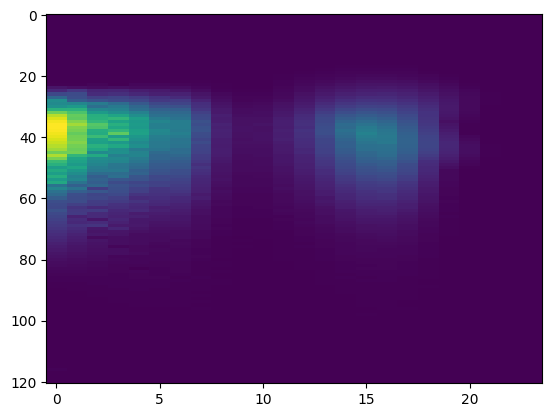

In [ ]:
plt.imshow(d['EEM'][0,:,:],aspect='auto')
plt.show()

In [ ]:
d['EEM'].shape, d['Y'].shape

((27, 121, 24), (27, 4))

Centering Dorrit

In [ ]:
X=d['EEM'][:,:,10:]
y=d['Y']
y_pred=list()

In [ ]:
X -= X.mean(axis = 0)

In [ ]:
y_mean=list()

In [ ]:
yyy=y.copy()

In [ ]:
for i in range(4):
  print(i)
  # y[:,i]*=1e6
  aaa=y[:,i].mean()
  y_mean.append(aaa)
  y[:,i]-=aaa

0
1
2
3


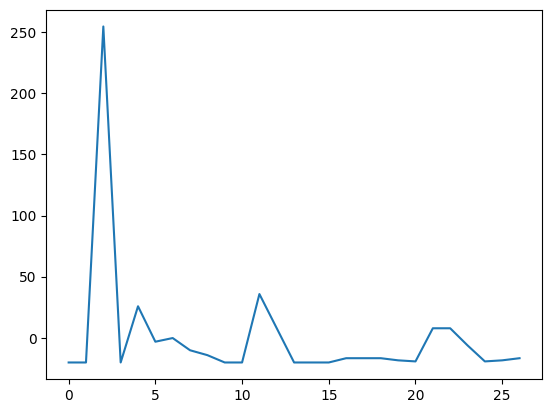

In [ ]:
plt.plot(y[:,0])
plt.show()

In [ ]:
resoult=list()

0


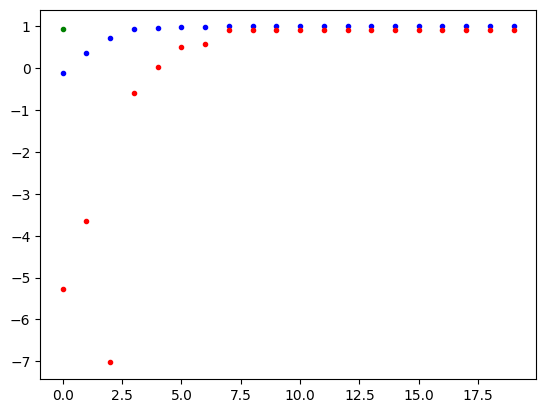

1


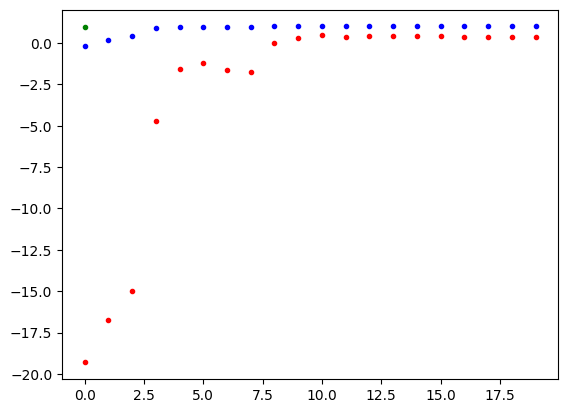

2


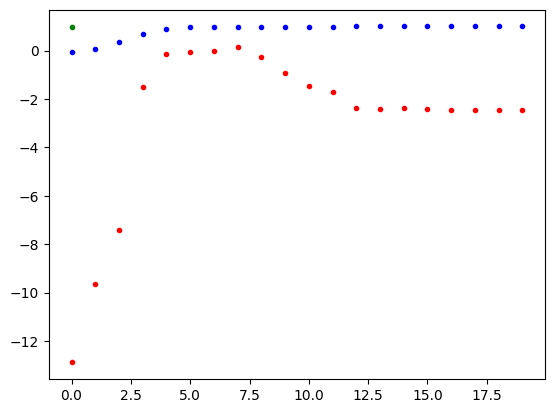

3


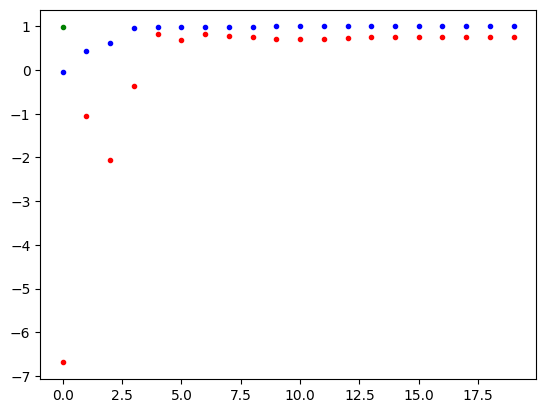

In [ ]:
for i in range(4):
  print(i)
  X_train, X_test, y_train, y_test = train_test_split(
    X, y[:,i], test_size=0.1428, random_state=42)
  npls1=npls()
  scoring={'mse': make_scorer(mean_squared_error),'r2':'r2'}
  parametrsNames={'n_components': range(20),
                  # 'a': np.logspace(-2, 0,num = 2)}
                  'a':[1]}
  
  gridCought=GridSearchCV(npls1, parametrsNames, cv=5, scoring=scoring,
                          refit='r2', return_train_score=True)
  gridCought.fit(X_train, y_train)
  r2_p=gridCought.score(X_test, y_test)
  mse_cv=gridCought.cv_results_[ "mean_test_mse" ]
  mse_c=gridCought.cv_results_[ "mean_train_mse" ]
  r2_cv=gridCought.cv_results_[ "mean_test_r2" ]
  r2_c=gridCought.cv_results_[ "mean_train_r2" ]
  resoult.append([gridCought.cv_results_,gridCought.best_params_])
  plt.plot(r2_p,".",color='green')
  plt.plot(r2_c,".",color='blue')
  plt.plot(r2_cv,".",color='red')
  plt.show()

  predictors=gridCought.predict(X)
  y_pred.append(predictors)

In [ ]:
resoult[3][0][ "mean_test_r2" ],resoult[0][0][ "mean_test_mse" ]

(array([-6.69347205, -1.03946617, -2.06137331, -0.35932071,  0.83630235,
         0.70121912,  0.83724281,  0.77144848,  0.76439258,  0.71286844,
         0.71721783,  0.72311014,  0.74223263,  0.75146216,  0.75434821,
         0.75872778,  0.75906272,  0.75884016,  0.75892594,  0.75892804]),
 array([2907.27420289, 1819.49311912, 1296.56709311,  690.18543505,
         701.7242128 ,  827.03984735,  681.8523304 ,  803.65948371,
         851.87063747,  893.81137469,  900.13724891,  918.21975399,
         912.38414383,  915.96501868,  917.14874112,  917.34072633,
         917.36279274,  917.41430019,  917.41052086,  917.4105963 ]))

In [ ]:
resoult[3][1]

{'a': 1, 'n_components': 6}

In [ ]:
n_com=[7,10,7,6]

In [ ]:
for i in range(4):
  y_pred[i]+=y_mean[i]
  y[:,i]+=y_mean[i]

In [5]:
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error

/tmp/ipykernel_3837/2053566368.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)


/tmp/ipykernel_3837/2053566368.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
/tmp/ipykernel_3837/2053566368.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
/tmp/ipykernel_3837/2053566368.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)


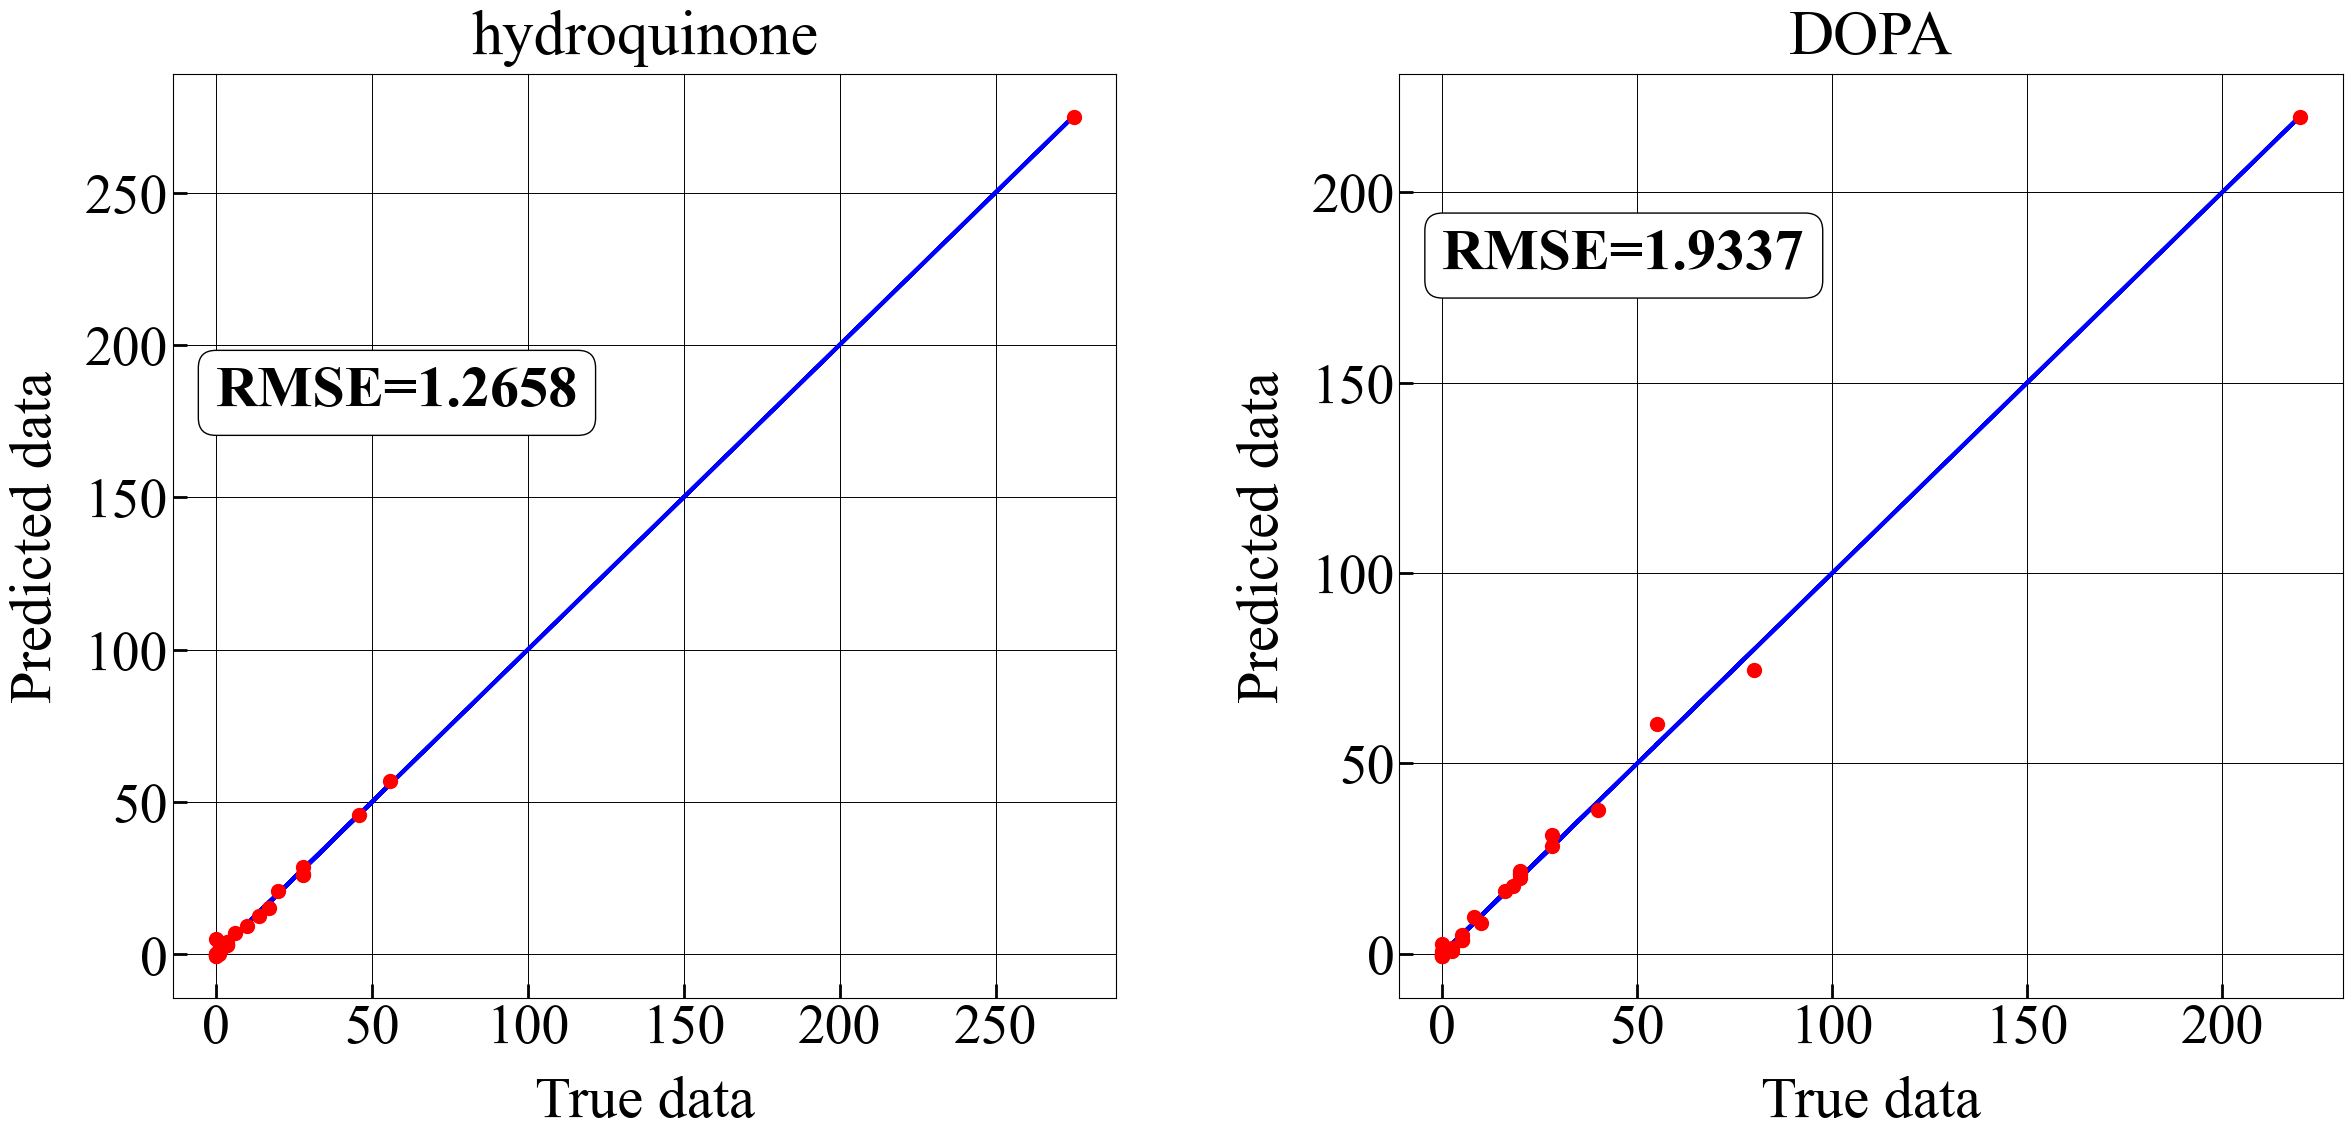

In [26]:
j=0
titLabFont=45
axLabFont=40
axNameLabFont=42
textFontSize=42
numRound=4
mpl.rc('font',family='Times New Roman')
fg = plt.figure(figsize=(28, 12),constrained_layout=False)
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fg)

plt.subplots_adjust(wspace=0.3, hspace=0.35)
# plt.subplots_adjust(hspace=0.3)

fig_ax_1 = fg.add_subplot(gs[0,0])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
# fig_ax_1.set_xlim(right=61,left=-4)
# fig_ax_1.set_ylim(top=51,bottom=-4)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("hydroquinone", fontsize=titLabFont,loc="center" ,
                   pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
mse=mean_squared_error(y[:,j], y_pred[j])
# numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
numStr=np.sqrt(mse).round(numRound)
stri='RMSE='+str(numStr)
fig_ax_1.text(0,180,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=3

fig_ax_1 = fg.add_subplot(gs[0,1])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
# fig_ax_1.set_xlim(right=101,left=-4)
# fig_ax_1.set_ylim(top=101,bottom=-4)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("DOPA", fontsize=titLabFont,loc="center" ,
                   pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
mse=mean_squared_error(y[:,j], y_pred[j])
# numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
numStr=np.sqrt(mse).round(numRound)
stri='RMSE='+str(numStr)
fig_ax_1.text(0,180,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')

plt.savefig('../Work/images/SVG/fig8/Dorrit_hD_true_pr_plots_short_4.svg',format='svg',bbox_inches='tight')
plt.savefig('../Work/images/PNG/fig8/Dorrit_hD_true_pr_plots_short_4.pdf',format='pdf',dpi=300,bbox_inches='tight')
plt.show();

In [ ]:
np.savez('dorrit_pr_plot',y=y,y_pred=y_pred,resoult=resoult,n_com=n_com)

In [2]:
d=np.load('../Work/images/SVG/fig8/dorrit_pr_plot.npz')

In [3]:
y=d['y']
y_pred=d['y_pred']
# resoult=d['resoult']
n_com=d['n_com']